# Part I - Ford GoBike Trip Data Exploration
## by Chidinma Ononuju

## Introduction
This document explores a dataset containing imformation about individual rides made in a bike sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from math import radians, cos, sin, asin, sqrt

%matplotlib inline

In [2]:
# loading the ford gobike trip dataset
trip_df = pd.read_csv('201902-fordgobike-tripdata.csv', parse_dates=[1,2])
print(trip_df.shape)
trip_df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# high level overview of the dataset and composition
print(trip_df.shape)
print(trip_df.dtypes)

(183412, 16)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object


In [4]:
# more info about our dataset
print(trip_df.info())
trip_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# missing values
trip_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

There are 183412 observations in this dataset with 16 features. Most of the features are numerical values. For categorial variables, we have start station nme, end station name, gender, user type and bike share for all trip. None of the categorical features are ordinal. 
There are two features that are of type datetime, representing the start time and end time of each trip, however, the duration_sec column gives the total duration of the trip in seconds, but for quality assurance, deriving the duration of each trip can be gotten from the start_time and end_time.
We can also derive the months and days the trips recorded were taken.

### What is/are the main feature(s) of interest in your dataset?

1. My main interest in this dataset is finding out what periods people use the gobike the most, the average duration of trips taken with fordgobike, and if there are any significant differences between a customer and a subscriber.
2. I would also like to know if frequency of trips is attributed to any gender, i.e, if a gender is known to use the gobike more than the other.
3. Exploring if age has something to do with if a user is a subscriber or just a customer is also what I would be exploring in this analysis

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe the start_time and end_time, duration_sec, user_type, member_gender, and member_birth_year features will help support my investigation.

## Data Wrangling

> First let's start by cleaning the dataset

### Quality
1. Drop unnecessary columns
2. Handle missing data


### Tidiness
1. Member_birth_year can be used to extract an age column
2. Distance can be calculated from longitude and latitude columns
3. Extract month and day of week from date columns

In [6]:
## making a copy of our dataset
trip_df_copy = trip_df.copy()
trip_df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Tidiness

### 1. Member_birth_year can be used to extract an age column

#### Define
> Create a new column and caculate the age of the user by subtracting the member_birth_year column from 2019

#### code

In [7]:
trip_df_copy['Age'] = 2019 - trip_df_copy['member_birth_year']

#### Test

In [8]:
print(trip_df_copy.info())
trip_df_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


In [9]:
trip_df_copy.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,Age
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,34.193563
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,18.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,27.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,32.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,39.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000


### 2. Distance can be calculated from longitude and latitude columns

#### Define
> Calculate distance using the Haversine formula

#### Code

In [10]:
trip_df_copy['trip_id'] = trip_df_copy.index

In [11]:
def haversine(df, startlat, startlon, endlat, endlon, to_radians=True, earth_radius=6371):
    """
    Calculating the distance between two points
    
    """
    lat1 = df[startlat]
    lon1 = df[startlon]
    lat2 = df[endlat]
    lon2 = df[endlon]
    
    if to_radians:
        lat1,lon1,lat2,lon2 = np.radians([lat1,lon1,lat2,lon2])
        
    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0) **2
    
    return earth_radius * 2 * np.arcsin(np.sqrt(a))

trip_df_copy['distance(KM)'] = haversine(trip_df_copy, "start_station_latitude", "start_station_longitude", "end_station_latitude", "end_station_longitude")

#### Test

In [12]:
trip_df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,trip_id,distance(KM)
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,0,0.544709
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN,1,1.742999
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,2,2.704545
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,3,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,4,2.409301


### 3. Extract month and day of week from date columns

#### Define
> Extract the start month and end month and start day and end day from the start_time and end_time columns

#### Code

In [13]:
def extract_month_day(df):
    """
    This function extracts the month and days of week from the dates in the dataset
    """
    
    df['start_month'] = df['start_time'].dt.strftime('%B')
    df['end_month'] = df['end_time'].dt.strftime('%B')
    
    df['start_day'] = df['start_time'].dt.strftime('%A')
    df['end_day'] = df['end_time'].dt.strftime('%A')

extract_month_day(trip_df_copy)

#### Test

In [14]:
trip_df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,Age,trip_id,distance(KM),start_month,end_month,start_day,end_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,35.0,0,0.544709,February,March,Thursday,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,NaN,1,1.742999,February,March,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,47.0,2,2.704545,February,March,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,30.0,3,0.260739,February,March,Thursday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,45.0,4,2.409301,February,March,Thursday,Friday


In [15]:
print(trip_df_copy.shape)
print(trip_df_copy.info())

(183412, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  use

### Quality
### 1. Drop unnecessary columns

#### Define
> Drop the trip_id, start_time, end_time, start_station_id, end_station_id, bike_id columns

#### Code

In [16]:
columns = ['start_time', 'end_time', 'start_station_id', 'end_station_id', 'bike_id', 'member_birth_year' ]
trip_df_copy.drop(columns, axis = 1, inplace=True)

#### Test

In [17]:
trip_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_station_name       183215 non-null  object 
 2   start_station_latitude   183412 non-null  float64
 3   start_station_longitude  183412 non-null  float64
 4   end_station_name         183215 non-null  object 
 5   end_station_latitude     183412 non-null  float64
 6   end_station_longitude    183412 non-null  float64
 7   user_type                183412 non-null  object 
 8   member_gender            175147 non-null  object 
 9   bike_share_for_all_trip  183412 non-null  object 
 10  Age                      175147 non-null  float64
 11  trip_id                  183412 non-null  int64  
 12  distance(KM)             183412 non-null  float64
 13  start_month              183412 non-null  object 
 14  end_

### 2. Handle missing values

#### Define
> 1. Delete rows where station_name is missing
> 2. Fill missing age with mean age
> 3. Fill missing gender with most frequent gender occurence

#### Code

In [18]:
def treat_missing_values(df):
    
    """
    This function drops missing rows where station_name is null and fills missing ages with it's mean and missing gender with
    its mode.
    """
    # drop rows where start_station_name is null
    df.dropna(subset=['start_station_name'], inplace=True)
    
    # fill null values with the mean for Age
    df.Age.mean()
    mean = int(df.Age.mean())
    df['Age'] = df['Age'].fillna(mean)

    # fill null values with the mode value for member_gender
    mode = df.member_gender.mode()[0]
    df['member_gender'] = df['member_gender'].fillna(mode)
    
    
treat_missing_values(trip_df_copy)

#### Test

In [19]:
trip_df_copy.isna().sum()

duration_sec               0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
Age                        0
trip_id                    0
distance(KM)               0
start_month                0
end_month                  0
start_day                  0
end_day                    0
dtype: int64

In [20]:
trip_df_copy.shape

(183215, 17)

In [21]:
trip_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183215 non-null  int64  
 1   start_station_name       183215 non-null  object 
 2   start_station_latitude   183215 non-null  float64
 3   start_station_longitude  183215 non-null  float64
 4   end_station_name         183215 non-null  object 
 5   end_station_latitude     183215 non-null  float64
 6   end_station_longitude    183215 non-null  float64
 7   user_type                183215 non-null  object 
 8   member_gender            183215 non-null  object 
 9   bike_share_for_all_trip  183215 non-null  object 
 10  Age                      183215 non-null  float64
 11  trip_id                  183215 non-null  int64  
 12  distance(KM)             183215 non-null  float64
 13  start_month              183215 non-null  object 
 14  end_

In [22]:
# Saving our cleaned dataset
trip_df_copy.to_csv('201902-fordgobike-tripdata_clean.csv', index = False)

## Univariate Exploration

First, I'll start by looking at the distribution of the quantitative variables 


In [ ]:
#plotting on it's normal scale
fig, ax = plt.subplots(nrows=3, figsize = [8,8])

variables = ['duration_sec', 'Age', 'distance(KM)']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(trip_df_copy[var]), max(trip_df_copy[var])+1, 1)
    ax[i].hist(data = trip_df_copy, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

From the plot above, we can already see some strong outliers on the right of the plot, this plot suggests that we have trip durations that are up to 80,000 seconds, ages reaching over 140 and distance covered getting to 70km. This suggests the presence of outliers. 

In [23]:
# defining a function to plot the quantitative variables on it's standard scale.
def plot_hist(binsize, col, col_name, df, title):
    """
    This function produces a histogram plot with the standard scale of the data provided without limits on it's x axis
    """
    binsize = binsize
    bins = np.arange(0, col.max()+binsize, binsize)

    plt.figure(figsize=[8, 5])
    plt.hist(data = df, x = col_name, bins = bins)
    plt.xlabel(col_name)
    plt.title(title)
    plt.show()
    
# defining a function to plot the quantitative variables on it's standard scale with limits.
def plot_hist_lim(binsize, col, col_name, df, lim, title):
    """
    This function produces a histogram plot with the standard scale of the data provided with limits on it's x axis
    """
    binsize = binsize
    bins = np.arange(0, col.max()+binsize, binsize)

    plt.figure(figsize=[8, 5])
    plt.hist(data = df, x = col_name, bins = bins)
    plt.xlim(lim)
    plt.xlabel(col_name)
    plt.title(title)
    plt.show()

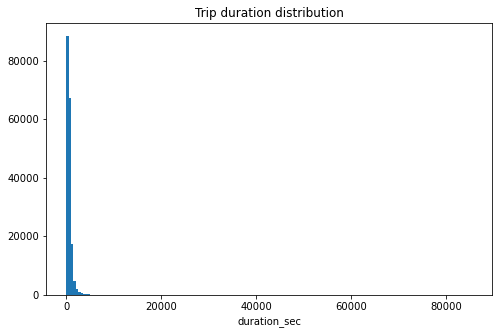

In [24]:
# Plotting the duration_sec variable on it's standard scale
plot_hist(500, trip_df_copy.duration_sec, 'duration_sec', trip_df_copy, 'Trip duration distribution')

The above data plotted on it's standard scale does not show clearly the distribution of the data as we have a number of outliers on the right side of the plot, so, I will be representing the distribution of the trip duration on a log scale.

In [25]:
np.log10(trip_df_copy.duration_sec.describe())

count    5.262961
mean     2.860878
std      3.254083
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

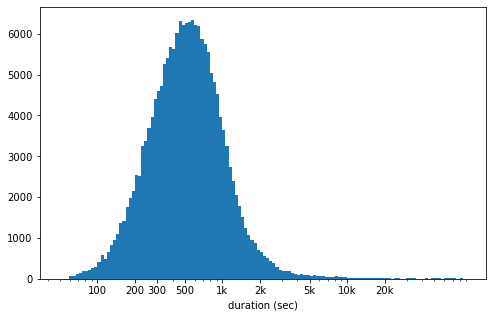

In [26]:
# plotting the duration variable on a log scale
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(trip_df_copy['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_df_copy, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100, 200, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4], [100, 200, 300, 500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('duration (sec)')
plt.show()

The plot above is unimodal, looking a lot like a normal distribution with it's tail skewed to the right. From the plot above, we see that the average duration distribution falls between 100secs to about 2k secs with it's peak between 300 to 1000secs

In [27]:
trip_df_copy.query('duration_sec >= 15000')

,duration_sec,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,Age,trip_id,distance(KM),start_month,end_month,start_day,end_day
0,52185,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,Customer,Male,No,35.0,0,0.544709,February,March,Thursday,Friday
1,42521,The Embarcadero at Steuart St,37.791464,-122.391034,Berry St at 4th St,37.775880,-122.393170,Customer,Male,No,34.0,1,1.742999,February,March,Thursday,Friday
2,61854,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,Male,No,47.0,2,2.704545,February,March,Thursday,Friday
3,36490,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,Subscriber,Other,No,30.0,3,0.260739,February,March,Thursday,Friday
199,15123,The Embarcadero at Bryant St,37.787168,-122.388098,Myrtle St at Polk St,37.785434,-122.419622,Subscriber,Male,No,39.0,199,2.776930,February,February,Thursday,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177908,15565,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,Female,No,32.0,177908,0.000000,February,February,Friday,Friday
177912,15541,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Customer,Male,No,35.0,177912,0.000000,February,February,Friday,Friday
178416,31203,Folsom St at 9th St,37.773717,-122.411647,Davis St at Jackson St,37.797280,-122.398436,Subscriber,Male,No,30.0,178416,2.865747,February,February,Friday,Friday
179155,15408,Alamo Square (Steiner St at Fulton St),37.777547,-122.433274,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Customer,Male,No,34.0,179155,3.153220,February,February,Friday,Friday


The above data represents the trip duration above 15000 seconds which have been identified as outliers in the data

In [28]:
high_outliers_duration = trip_df_copy.query('duration_sec >= 15000')
high_outliers_duration.head()

,duration_sec,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,Age,trip_id,distance(KM),start_month,end_month,start_day,end_day
0,52185,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,Customer,Male,No,35.0,0,0.544709,February,March,Thursday,Friday
1,42521,The Embarcadero at Steuart St,37.791464,-122.391034,Berry St at 4th St,37.775880,-122.393170,Customer,Male,No,34.0,1,1.742999,February,March,Thursday,Friday
2,61854,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,Male,No,47.0,2,2.704545,February,March,Thursday,Friday
3,36490,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,Subscriber,Other,No,30.0,3,0.260739,February,March,Thursday,Friday
199,15123,The Embarcadero at Bryant St,37.787168,-122.388098,Myrtle St at Polk St,37.785434,-122.419622,Subscriber,Male,No,39.0,199,2.776930,February,February,Thursday,Thursday


I have identified trip durations higher than 20k secs as outliers and placed them in a dataframe called high_outliers_duration. A separate analysis on this dataset will be carried out to find out more about trips in that category

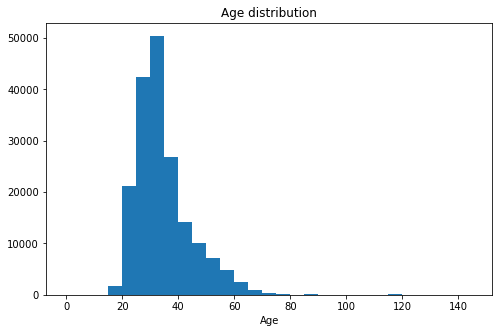

In [29]:
# Plotting the Age on it's standard scale
trip_df_copy.Age = trip_df_copy.Age.astype(int)
plot_hist(5, trip_df_copy.Age, 'Age', trip_df_copy, 'Age distribution')

From this plot above, we can identify some outliers. Users above age 80. Logically, not sure if people above the ages of 80 can still ride bikes, lol, it could be as a result of wrong data entry. We will take a look at these cases and find out more information about these instances

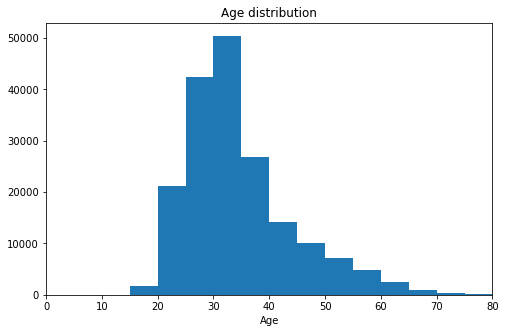

In [30]:
# zooming into the plot
plot_hist_lim(5, trip_df_copy.Age, 'Age', trip_df_copy, (0,80), 'Age distribution')

We can see from the above plot that the distribution is skewed to the right. There is a majority of users betwen the age group of 20 - 40 years

In [31]:
high_outliers_age = trip_df_copy.query('Age > 80')
high_outliers_age

,duration_sec,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,Age,trip_id,distance(KM),start_month,end_month,start_day,end_day
1285,148,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,Shattuck Ave at 55th St,37.840364,-122.264488,Subscriber,Male,Yes,119,1285,0.792753,February,February,Thursday,Thursday
5197,217,Central Ave at Fell St,37.773311,-122.444293,Broderick St at Oak St,37.773063,-122.439078,Subscriber,Male,No,88,5197,0.459184,February,February,Thursday,Thursday
5266,384,Duboce Park,37.769200,-122.433812,Broderick St at Oak St,37.773063,-122.439078,Subscriber,Male,No,88,5266,0.631391,February,February,Thursday,Thursday
5447,147,Duboce Park,37.769200,-122.433812,Page St at Scott St,37.772406,-122.435650,Subscriber,Male,No,88,5447,0.391334,February,February,Thursday,Thursday
10827,1315,Bryant St at 2nd St,37.783172,-122.393572,Grove St at Masonic Ave,37.774836,-122.446546,Subscriber,Male,No,119,10827,4.747020,February,February,Wednesday,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177885,517,Howard St at 2nd St,37.787522,-122.397405,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,Subscriber,Female,No,117,177885,1.228913,February,February,Friday,Friday
177955,377,1st St at Folsom St,37.787290,-122.394380,5th St at Folsom,37.780146,-122.403071,Subscriber,Female,Yes,86,177955,1.102003,February,February,Friday,Friday
179280,355,Valencia St at 24th St,37.752428,-122.420628,22nd St at Dolores St,37.755000,-122.425728,Subscriber,Male,No,81,179280,0.531838,February,February,Friday,Friday
182830,428,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,Subscriber,Male,No,118,182830,1.029114,February,February,Friday,Friday


In [32]:
trip_df.query('(2019 - member_birth_year) > 80').duration_sec.mean()

424.671875

The above shows the mean trip duration of users above the age of 80 years. Approximately 425 seconds for trip duration which is about 7mins. 

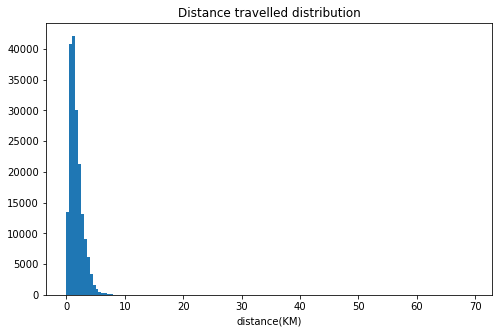

In [33]:
# Plotting the distance covered on it's standard scale
plot_hist(0.5, trip_df_copy['distance(KM)'], 'distance(KM)', trip_df_copy, 'Distance travelled distribution')

In [34]:
trip_df_copy['distance(KM)'].describe()

count    183215.000000
mean          1.691352
std           1.097611
min           0.000000
25%           0.910955
50%           1.432473
75%           2.226127
max          69.469241
Name: distance(KM), dtype: float64

In [35]:
trip_df_copy[trip_df_copy['distance(KM)'] > 10]

,duration_sec,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,Age,trip_id,distance(KM),start_month,end_month,start_day,end_day
19827,2229,Foothill Blvd at Fruitvale Ave,37.783757,-122.222603,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Subscriber,Male,Yes,30,19827,15.673955,February,February,Tuesday,Tuesday
50859,3225,College Ave at Harwood Ave,37.848152,-122.252160,Howard St at Beale St,37.789756,-122.394643,Subscriber,Other,Yes,31,50859,14.099709,February,February,Thursday,Thursday
84701,16022,Lake Merritt BART Station,37.797320,-122.265320,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,Male,No,34,84701,12.325638,February,February,Sunday,Sunday
85529,8957,Lake Merritt BART Station,37.797320,-122.265320,The Embarcadero at Vallejo St,37.799953,-122.398525,Subscriber,Male,Yes,44,85529,11.707442,February,February,Sunday,Sunday
87602,4378,Broadway at Battery St,37.798572,-122.400869,Grand Ave at Santa Clara Ave,37.812744,-122.247215,Customer,Male,No,26,87602,13.590843,February,February,Sunday,Sunday
89787,1800,10th St at Fallon St,37.797673,-122.262997,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Subscriber,Male,Yes,44,89787,11.531223,February,February,Saturday,Saturday
112038,6945,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Palm St at Willow St,37.317298,-121.884995,Subscriber,Female,No,34,112038,69.469241,February,February,Tuesday,Tuesday
121514,1792,14th St at Mandela Pkwy,37.810743,-122.291415,16th St Mission BART Station 2,37.764765,-122.420091,Subscriber,Male,No,31,121514,12.409551,February,February,Monday,Monday
138857,57059,Frank H Ogawa Plaza,37.804562,-122.271738,4th St at Harrison St,37.780955,-122.399749,Customer,Male,No,34,138857,11.550564,February,February,Thursday,Friday
153112,2216,Marston Campbell Park,37.809824,-122.280192,Valencia St at 24th St,37.752428,-122.420628,Subscriber,Female,Yes,30,153112,13.894462,February,February,Wednesday,Wednesday


In [36]:
high_outliers_distance = trip_df_copy[trip_df_copy['distance(KM)'] > 10]
high_outliers_distance

,duration_sec,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,Age,trip_id,distance(KM),start_month,end_month,start_day,end_day
19827,2229,Foothill Blvd at Fruitvale Ave,37.783757,-122.222603,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Subscriber,Male,Yes,30,19827,15.673955,February,February,Tuesday,Tuesday
50859,3225,College Ave at Harwood Ave,37.848152,-122.252160,Howard St at Beale St,37.789756,-122.394643,Subscriber,Other,Yes,31,50859,14.099709,February,February,Thursday,Thursday
84701,16022,Lake Merritt BART Station,37.797320,-122.265320,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,Male,No,34,84701,12.325638,February,February,Sunday,Sunday
85529,8957,Lake Merritt BART Station,37.797320,-122.265320,The Embarcadero at Vallejo St,37.799953,-122.398525,Subscriber,Male,Yes,44,85529,11.707442,February,February,Sunday,Sunday
87602,4378,Broadway at Battery St,37.798572,-122.400869,Grand Ave at Santa Clara Ave,37.812744,-122.247215,Customer,Male,No,26,87602,13.590843,February,February,Sunday,Sunday
89787,1800,10th St at Fallon St,37.797673,-122.262997,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,Subscriber,Male,Yes,44,89787,11.531223,February,February,Saturday,Saturday
112038,6945,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Palm St at Willow St,37.317298,-121.884995,Subscriber,Female,No,34,112038,69.469241,February,February,Tuesday,Tuesday
121514,1792,14th St at Mandela Pkwy,37.810743,-122.291415,16th St Mission BART Station 2,37.764765,-122.420091,Subscriber,Male,No,31,121514,12.409551,February,February,Monday,Monday
138857,57059,Frank H Ogawa Plaza,37.804562,-122.271738,4th St at Harrison St,37.780955,-122.399749,Customer,Male,No,34,138857,11.550564,February,February,Thursday,Friday
153112,2216,Marston Campbell Park,37.809824,-122.280192,Valencia St at 24th St,37.752428,-122.420628,Subscriber,Female,Yes,30,153112,13.894462,February,February,Wednesday,Wednesday


In [37]:
high_outliers_distance.Age.mean()

34.72727272727273

In [38]:
high_outliers_distance['distance(KM)'].mean()

17.980350243028703

In [39]:
high_outliers_distance.duration_sec.mean()

9725.454545454546

The outliers identified in the distance covered was a total of 11 observations, for these outliers, the average age recorded is 34years, with the average trip duration of about 3hrs. Most of the users falling into this category were males and subscribers.

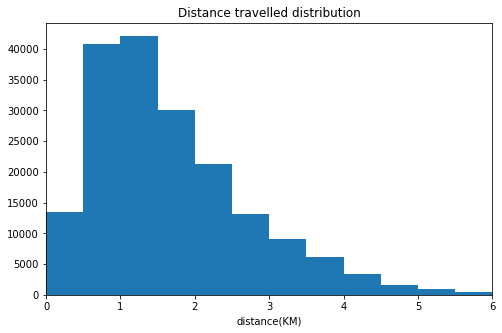

In [40]:
# zooming into the plot
plot_hist_lim(0.5, trip_df_copy['distance(KM)'], 'distance(KM)', trip_df_copy, (0,6), 'Distance travelled distribution')

Zooming into the plot, we can see that the average distance covered falls in the range of 0.5km - 2km. We can also see a steady decline to the right, giving the plot a right skew.

We can see that both the age and distance covered are unimodals skewed to the right, I wonder if this implies a positive correlation between these two points

I'll now move to the categorical variables: gender, user_type, start_month, end_month, bike_for_all_trips, start_day, end_day

None of these variales are ordinal. For the month and day, at first I thought of making it ordinal as we know days of the week and months of the year follow a particular order, but for this exploratory analysis, they will be treated as a nominal variable because I want to know what months of the year and days of the week have recorded the highest and lowest start and end trips respectively

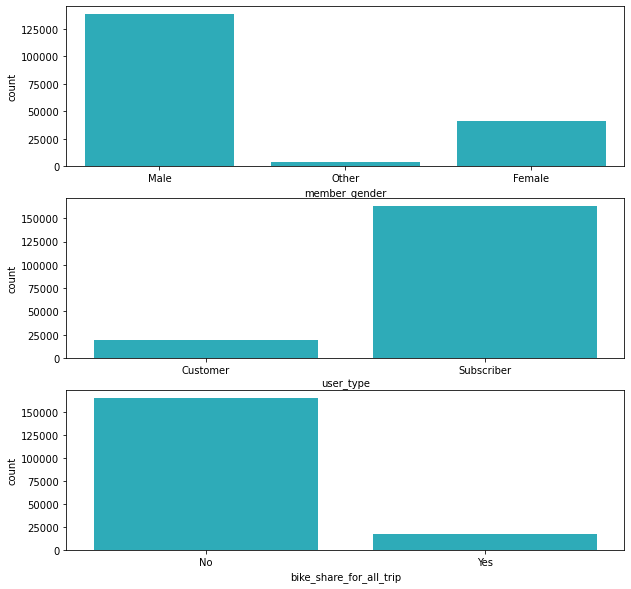

In [41]:
# let's plot all three together to get an idea of each variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [10,10])

default_color = sb.color_palette()[9]
sb.countplot(data = trip_df_copy, x = 'member_gender', color = default_color, ax = ax[0])
sb.countplot(data = trip_df_copy, x = 'user_type', color = default_color, ax = ax[1])
sb.countplot(data = trip_df_copy, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])

plt.show()

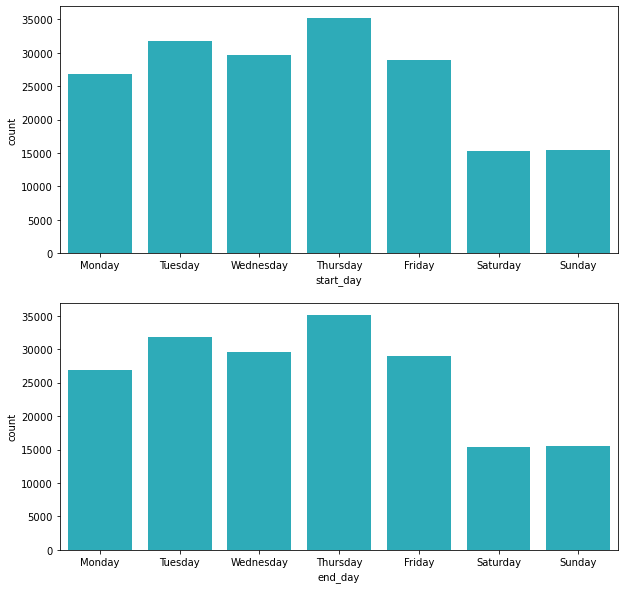

In [82]:
# plotting the start day variable
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax = plt.subplots(nrows=2, figsize = [10,10])

default_color = sb.color_palette()[9]
sb.countplot(data = trip_df_copy, x = 'start_day', color = default_color, ax = ax[0], order=day_order)
sb.countplot(data = trip_df_copy, x = 'end_day', color = default_color, ax = ax[1], order=day_order)

plt.show()



More trips were recorded to have been taken on Thursdays, and Tuesdays, the least trips were taken on Saturdays and Sundays.

In [43]:
# get order of bars by order of days of the week
def plot_bars_by_freq(col, col_name):
    # day_counts = col.value_counts()
    
    base_color = sb.color_palette()[9]
    sb.countplot(data = trip_df_copy, y = col_name, color = base_color, order = day_order)
    

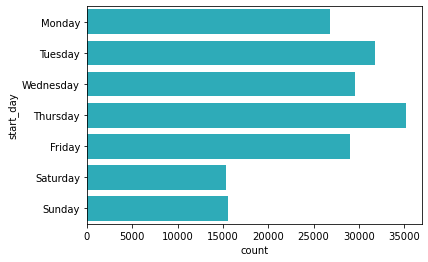

In [44]:
plot_bars_by_freq(trip_df_copy.start_day, 'start_day')

We can see the same thing here as well

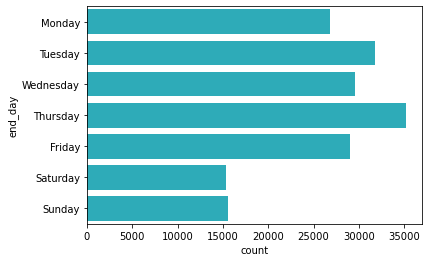

In [45]:
plot_bars_by_freq(trip_df_copy.start_day, 'end_day')

The plots give the same inforamtion as observerd in the initial frequency bar chart for days of trips

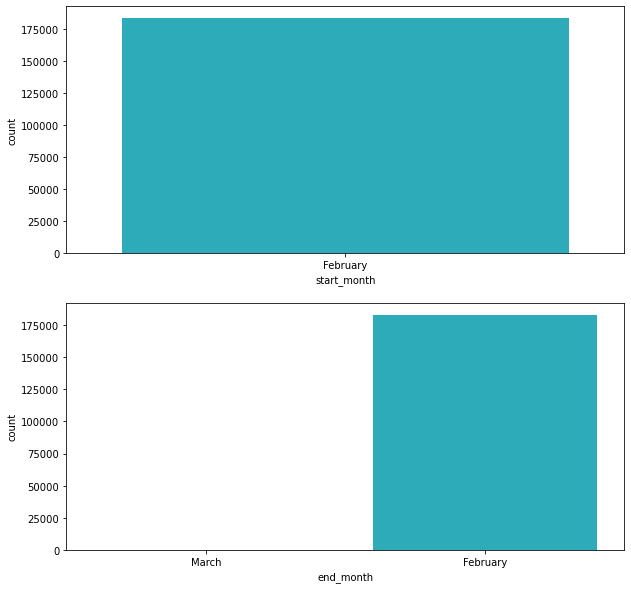

In [46]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])

default_color = sb.color_palette()[9]
sb.countplot(data = trip_df_copy, x = 'start_month', color = default_color, ax = ax[0])
sb.countplot(data = trip_df_copy, x = 'end_month', color = default_color, ax = ax[1])

plt.show()

From the above plots, here are some interesting obeservations:
1. More men have made trips with the ford bike in 2019
2. The trips in the dataset provided only covered trips taken in the month of February.
3. Most of the users in the dataset provided are subscribers.
4. Majority of the users do not use fordbike for all their trips
5. People usually start and end trips on the same day.
6. Thursdays seem to be the day of the week having most trips taken, followed by Tuesdays while Saturdays and Sundays have the least trips taken.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable had a large range of value so I performed a log transformation. Under this transformation, the model was unimodal and closely looked like a normal distribution with a right skew.
> Both the age and the distance distribution was skewed to the right.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the duration_sec varaible, a log transformation was done because of the large range of values present. 
> No scale transformation was done on the other variables, however, all three quantitative variables had outliers. I saved them in each of it's own individual dataframe to perform more analysis on them.


## Bivariate Exploration

> I'll start by looking at the pair to pair correlation between the variables in our dataset

In [47]:
# getting rid of the outliers to avoid bias in our bivariant exploration
df_no_outliers = trip_df_copy.query('Age < 80')
df_no_outliers.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,Age,trip_id,distance(KM)
count,183012.000000,183012.000000,183012.000000,183012.000000,183012.000000,183012.000000,183012.000000,183012.000000
mean,726.210680,37.771597,-122.353066,37.771803,-122.352652,34.116812,91735.018403,1.691754
std,1795.997842,0.098964,0.116430,0.098869,0.116005,9.645955,52956.891447,1.097341
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,18.000000,0.000000,0.000000
25%,325.000000,37.770407,-122.412408,37.770407,-122.411726,27.000000,45880.750000,0.910955
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,32.000000,91775.500000,1.432473
75%,796.000000,37.797280,-122.287180,37.797320,-122.288665,38.000000,137608.250000,2.226187
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,78.000000,183411.000000,69.469241


In [48]:
df_no_outliers = df_no_outliers[trip_df_copy['distance(KM)'] < 10]
df_no_outliers.describe()

C:\Users\Chidinma\AppData\Local\Temp\ipykernel_14184\3953033156.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[trip_df_copy['distance(KM)'] < 10]


,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,Age,trip_id,distance(KM)
count,183001.000000,183001.000000,183001.000000,183001.000000,183001.000000,183001.000000,183001.000000,183001.000000
mean,725.669745,37.771596,-122.353069,37.771805,-122.352652,34.116775,91734.490997,1.690775
std,1790.654196,0.098967,0.116432,0.098866,0.116002,9.646128,52957.495400,1.082703
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,18.000000,0.000000,0.000000
25%,325.000000,37.770407,-122.412408,37.770407,-122.411726,27.000000,45879.000000,0.910955
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,32.000000,91776.000000,1.432473
75%,796.000000,37.797280,-122.287180,37.797320,-122.288665,38.000000,137608.000000,2.226187
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,78.000000,183411.000000,9.929011


In [49]:
df_no_outliers = df_no_outliers.query('duration_sec < 15000')
df_no_outliers.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,Age,trip_id,distance(KM)
count,182713.000000,182713.000000,182713.000000,182713.000000,182713.000000,182713.000000,182713.000000,182713.000000
mean,668.476480,37.771587,-122.353040,37.771797,-122.352623,34.116363,91739.591343,1.691227
std,717.044412,0.099001,0.116459,0.098900,0.116029,9.648280,52957.622636,1.082607
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,18.000000,4.000000,0.000000
25%,325.000000,37.770407,-122.412408,37.770407,-122.411726,27.000000,45889.000000,0.912028
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,32.000000,91780.000000,1.432473
75%,794.000000,37.797280,-122.286533,37.797320,-122.288665,38.000000,137622.000000,2.226224
max,14962.000000,37.880222,-121.874119,37.880222,-121.874119,78.000000,183411.000000,9.929011


In [50]:
# grouping the variables
numeric_vars = ['duration_sec', 'Age', 'distance(KM)']
categorical_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'start_month', 'end_month', 'start_day', 'end_day']

df_no_outliers.shape= (182713, 17)
df_no_outliers_samp.shape= (1000, 17)


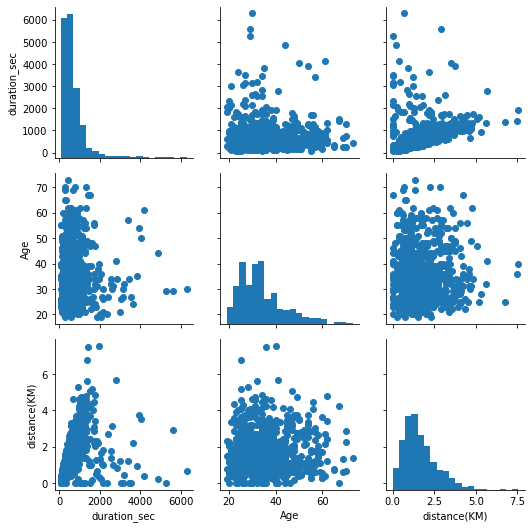

In [51]:
# plot matrix: sample 1000 trips so that plots are clearer and they render faster
print("df_no_outliers.shape=",df_no_outliers.shape)
df_no_outliers_samp = df_no_outliers.sample(n=1000, replace = False)
print("df_no_outliers_samp.shape=",df_no_outliers_samp.shape)

g = sb.PairGrid(data = df_no_outliers_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

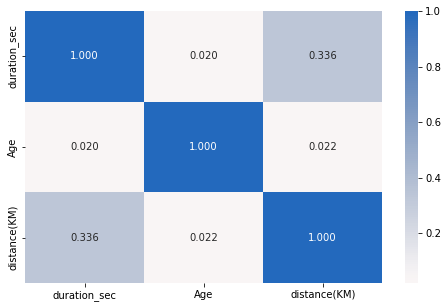

In [52]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_no_outliers[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

We can observe a slight correlation between the distance and duration variables which makes sense because, logically, the longer the distance, the more time it should take to complete a trip.

Let's look closely at the distance and duration with the duration on a log scale.

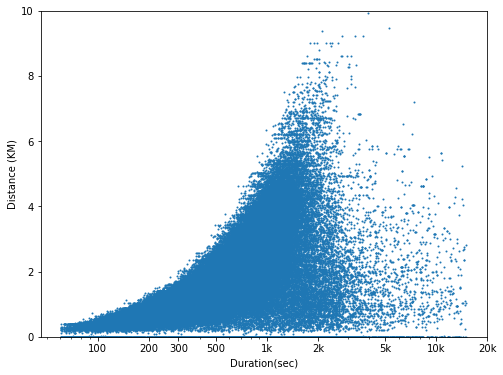

In [73]:
# scatter plot of duration vs. distance, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = df_no_outliers, x = 'duration_sec', y = 'distance(KM)', s = 1)
plt.ylim([0, 10])
plt.xlabel('Duration(sec)')
plt.xscale('log')
plt.xticks([100, 200, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4], [100, 200, 300, 500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Distance (KM)')
plt.show()

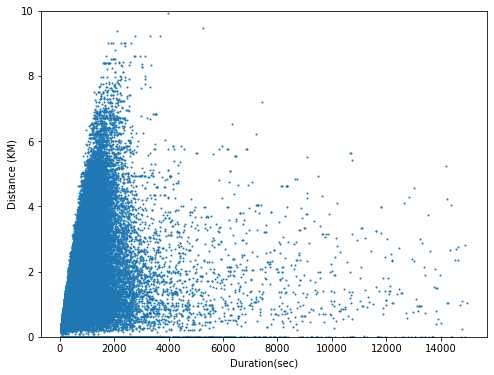

In [74]:
# scatter plot of duration vs. distance on it's standard scale

plt.figure(figsize = [8, 6])
plt.scatter(data = df_no_outliers, x = 'duration_sec', y = 'distance(KM)', s = 1)
plt.ylim([0, 10])
plt.xlabel('Duration(sec)')
plt.ylabel('Distance (KM)')
plt.show()

I can observe from the graph above that some small distances took a longer time to complete, this could point other factors faced during those trips. Factors like speed, traffic, purpose of trip, could speak to why this could have been

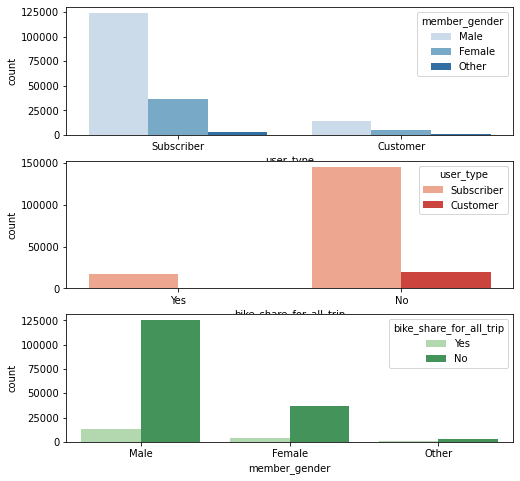

In [53]:
plt.figure(figsize = [8, 8])

# subplot 1: user_type vs member_gender
plt.subplot(3, 1, 1)
sb.countplot(data = df_no_outliers, x = 'user_type', hue = 'member_gender', palette = 'Blues')

# subplot 2: bike_share_for_all_trip vs. user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_no_outliers, x = 'bike_share_for_all_trip', hue = 'user_type', palette = 'Reds')


# subplot 3: member_gender vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_no_outliers, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Greens')

plt.show()

From the three clustered bar charts, we can pick some very interesting observations. I can see that in the month of February 2019, the trips taken were mostly taken by actual subscribers, we have more males in our datset who took trips with the goBike and are Subscribers as well, however, but irrespective of usertype or gender, most users don't use the ford gobike for all their trips

<Figure size 720x720 with 0 Axes>

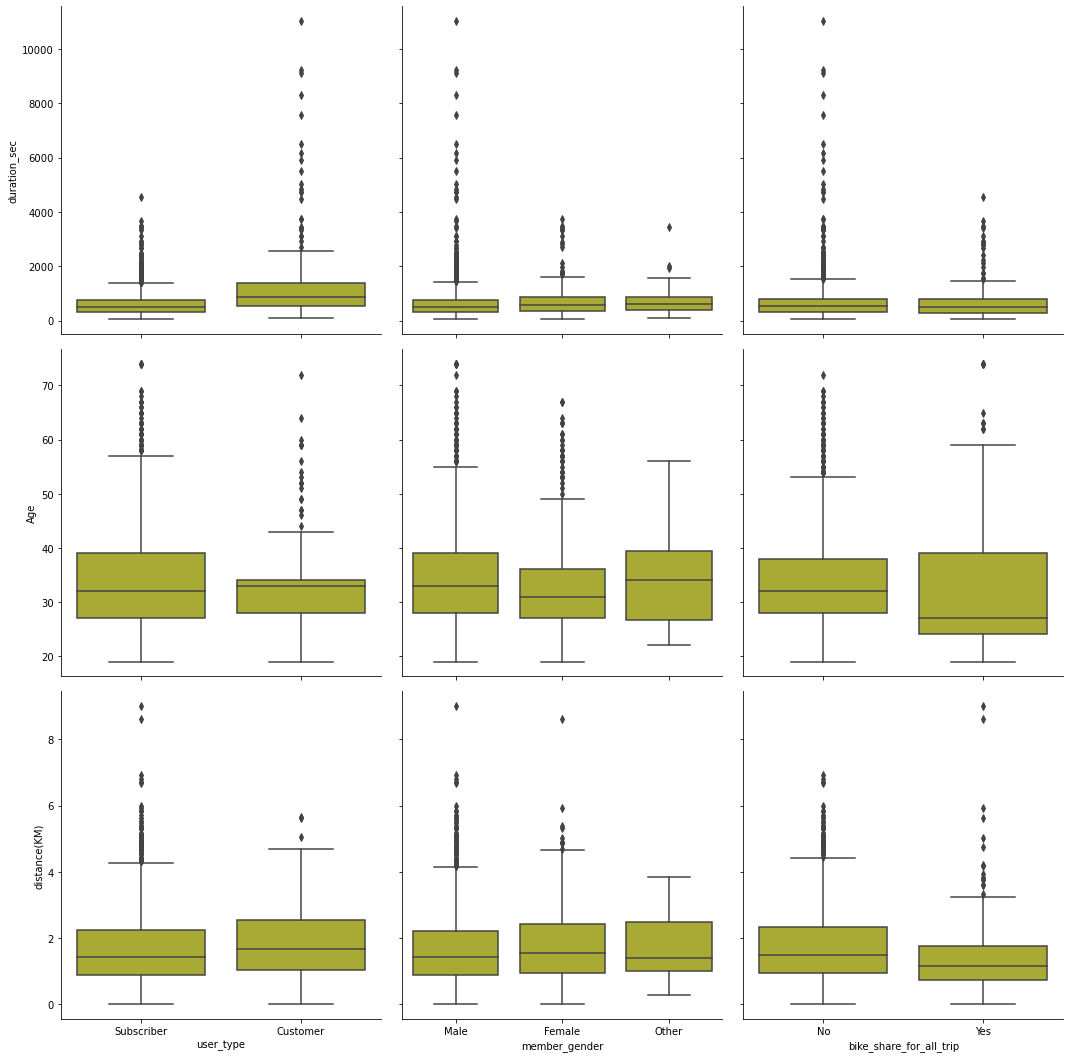

In [88]:
# plot matrix of numeric features against categorical features.

df_no_outliers_samp = df_no_outliers.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """
    This function creates a boxplot with our quantitative and qualitative variables
    """
    default_color = sb.color_palette()[8]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_no_outliers_samp, y_vars = ['duration_sec', 'Age', 'distance(KM)'], x_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip'],
                height = 5, aspect = 1)
g.map(boxgrid)
plt.show();

There seem to be some interesting relationships between the usertype and duration from the above box plots, let's take a look at them closely with individual plots to identify any relationship

<Figure size 720x720 with 0 Axes>

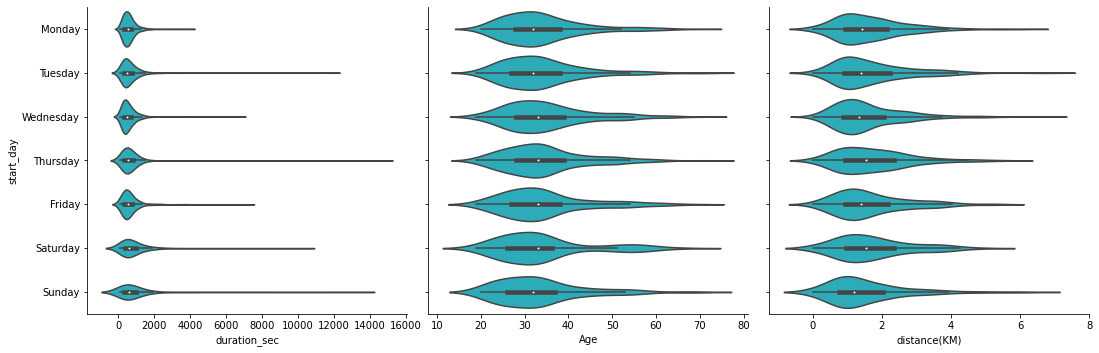

In [85]:
def violingrid(x, y, **kwargs):
    """
    This function creates a violin plot with our quantitative and qualitative variables
    """
    default_color = sb.color_palette()[9]
    sb.violinplot(x=x, y=y, color=default_color, order=day_order)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_no_outliers_samp, x_vars = ['duration_sec', 'Age', 'distance(KM)'], y_vars = ['start_day'],
                height = 5, aspect = 1)
g.map(violingrid)
plt.show();

This is a plot of duration against start day of the trips, their mean values seem to be very cloes to each other, howerver, we can see a slight increase on days like Saturday, let's plot on another plot to identify this more

<Figure size 720x720 with 0 Axes>

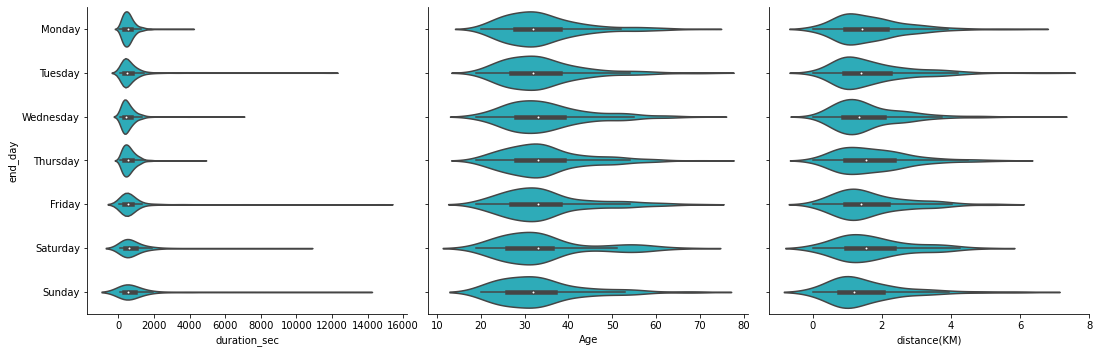

In [86]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_no_outliers_samp, x_vars = ['duration_sec', 'Age', 'distance(KM)'], y_vars = ['end_day'],
                height = 5, aspect = 1)
g.map(violingrid)
plt.show();

The start and end days have the same duration records as it belongs to the same observation row, so, we will focus on just start day for the rest of our plots

<Figure size 720x720 with 0 Axes>

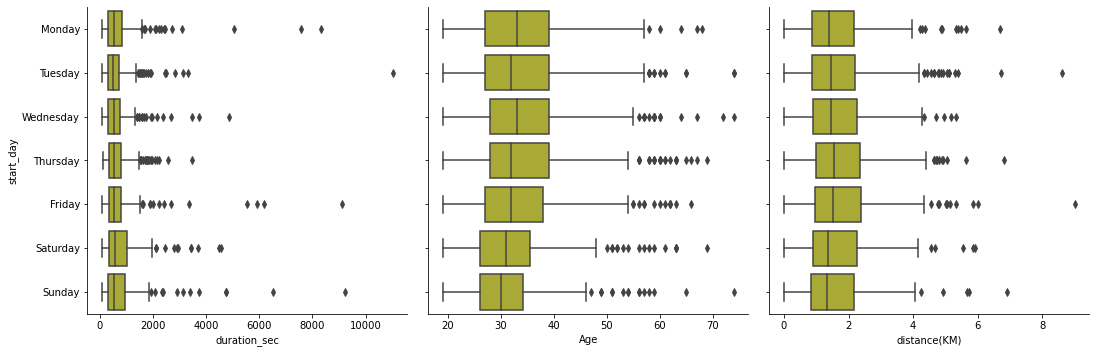

In [89]:
def boxgrid(x, y, **kwargs):
    """
    This function creates a boxplot with our quantitative and qualitative variables
    """
    default_color = sb.color_palette()[8]
    sb.boxplot(x=x, y=y, color=default_color, order=day_order)
    
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_no_outliers_samp, x_vars = ['duration_sec', 'Age', 'distance(KM)'], y_vars = ['start_day'],
                height = 5, aspect = 1)
g.map(boxgrid)
plt.show();

I have used a box plot to try and see if there is any correlation between ages and days of the week, but there is none, I believe it is now safe to say that there is no strong correlation between age and when users tend to ride the gobikes

<Figure size 720x720 with 0 Axes>

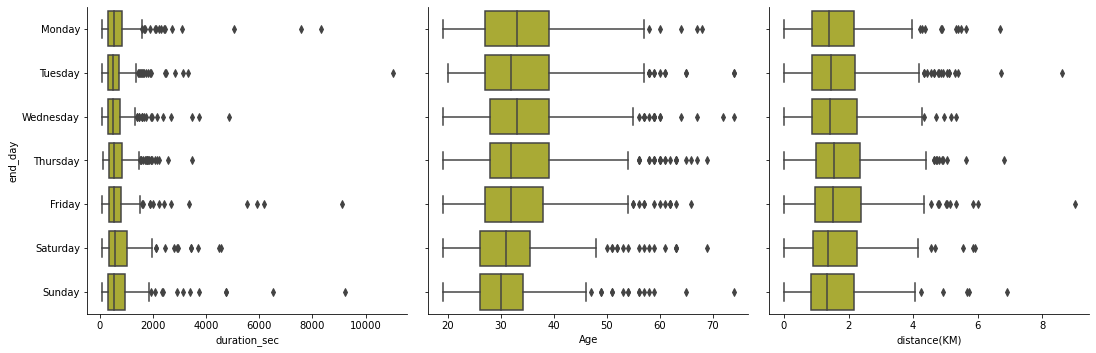

In [90]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_no_outliers_samp, x_vars = ['duration_sec', 'Age', 'distance(KM)'], y_vars = ['end_day'],
                height = 5, aspect = 1)
g.map(boxgrid)
plt.show();

The same observation above applies to the end day trip as well, I will stop focusing on the end day variable since we have seen that most of the trips taken with the ford gobike start and ends on the same day.

In [59]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """
    this function computes the logarithm of price to make multivariate plotting easier
    """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_no_outliers['log_duration'] = df_no_outliers['duration_sec'].apply(log_trans)

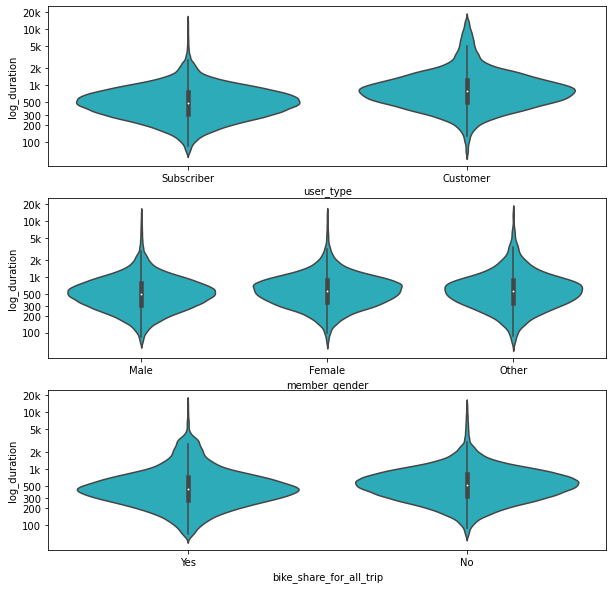

In [60]:
# plot the categorical variables against duration, this time
# with full data and variable transforms
c_var_1 = ['user_type', 'member_gender', 'bike_share_for_all_trip']
fig, ax = plt.subplots(ncols = 1, nrows = 3 , figsize = [10,10])

for i in range(len(c_var_1)):
    var = c_var_1[i]
    sb.violinplot(data = df_no_outliers, x = var, y = 'log_duration', ax = ax[i],
               color = default_color)
    ax[i].set_yticks(log_trans(np.array([100, 200, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[i].set_yticklabels([100, 200, 300, 500, '1k', '2k', '5k', '10k', '20k'])
    

plt.show()

Ah, here is another plot showing that the customers spend more time on average than regular subscribers, we don't have much difference in average duration when it comes to gender.

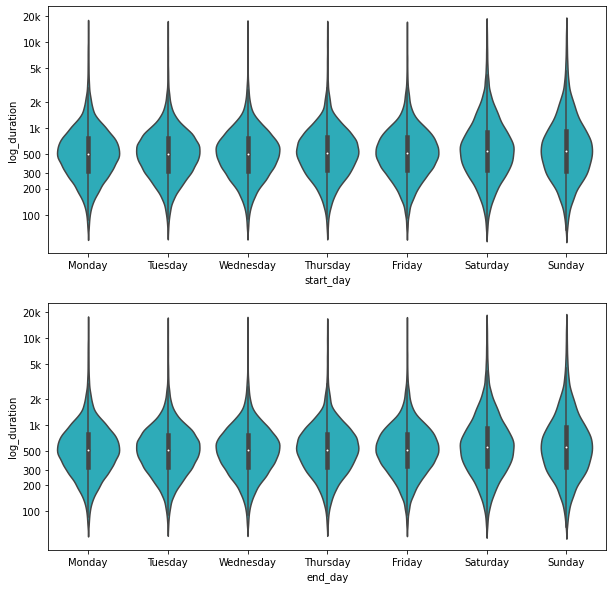

In [98]:
c_var_2 = ['start_day', 'end_day']
fig, ax = plt.subplots(ncols = 1, nrows = 2 , figsize = [10,10])

for i in range(len(c_var_2)):
    var = c_var_2[i]
    sb.violinplot(data = df_no_outliers, x = var, y = 'log_duration', ax = ax[i],
               color = default_color, order=day_order)
    ax[i].set_yticks(log_trans(np.array([100, 200, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[i].set_yticklabels([100, 200, 300, 500, '1k', '2k', '5k', '10k', '20k'])
    

plt.show()

The violin plots above both represent the distribution of trip durations taken across the different days of the week, we can observer that the average duration of trips on the different days of the week are very similar.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the above visualization between the duration and distance, we can see that there is a strong positive correlation between them, which is logical because it should take a onger time to cover a greater distance. We can also see that a higher average distance is covered by users who are not subscribed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We can also see that irrespective of user type, majority of the users do not use bike share for all their trips. We have more male subscribers than female subscribers and the average age is around 30 - 40years. 
> Even with Thursdays being the day most people take trips, we can still see that the average duration of trips for other days is around the same

## Multivariate Exploration

> For this part, I will be exploring the relationship between duration of trip, the age of the user and three main categories of interest (member_gender, user_type, and start_day)

In [62]:
def hist2dgrid(x, y, **kwargs):
    """
    This function plots a heatmap with the two of our selected quantitative variable against each of our qualitative variable
    """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 83, 5)
    bins_y = np.arange(1.7, 5.0+0.2, 0.2)
    
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    
    plt.yticks(log_trans(np.array([100, 200, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4])),
               [100, 200, 300, 500, '1k', '2k', '5k', '10k', '20k'])

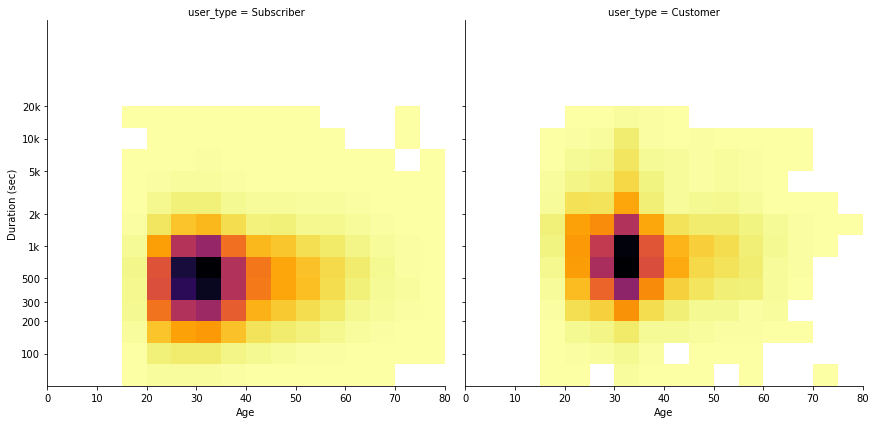

In [63]:
# create faceted heat maps on levels of the user type variable
g = sb.FacetGrid(data = df_no_outliers, col = 'user_type', col_wrap = 3, height = 6,
                 xlim = [0, 10])
g.map(hist2dgrid, 'Age', 'log_duration', color = 'inferno_r')
g.set_xlabels('Age')
g.set_ylabels('Duration (sec)')

plt.show()

From the heat maps above, I can see that there is a huge concentration of data around age range 30 - 40years and distance covered between 300 - 1k, this proves more the distribution of the age and duration as seen in the histograms above, irrespective of the user type

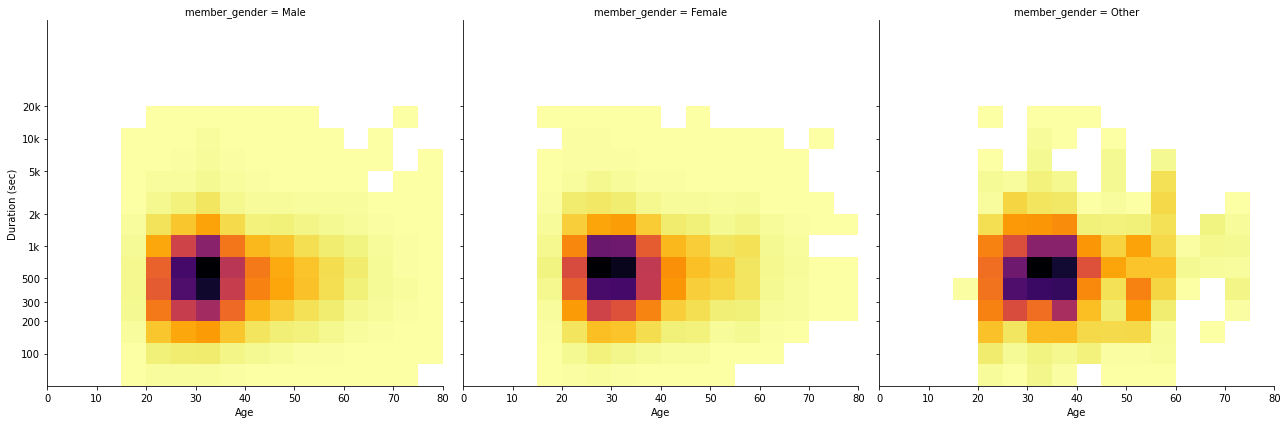

In [64]:
# create faceted heat maps on levels of the gender variable
g = sb.FacetGrid(data = df_no_outliers, col = 'member_gender', col_wrap = 3, height = 6,
                 xlim = [0, 10])
g.map(hist2dgrid, 'Age', 'log_duration', color = 'inferno_r')
g.set_xlabels('Age')
g.set_ylabels('Duration (sec)')

plt.show()

This is another heatmap that shows the same observation pointed above. Both mala and females are roughly around the same age and spend similar time on bike trips.

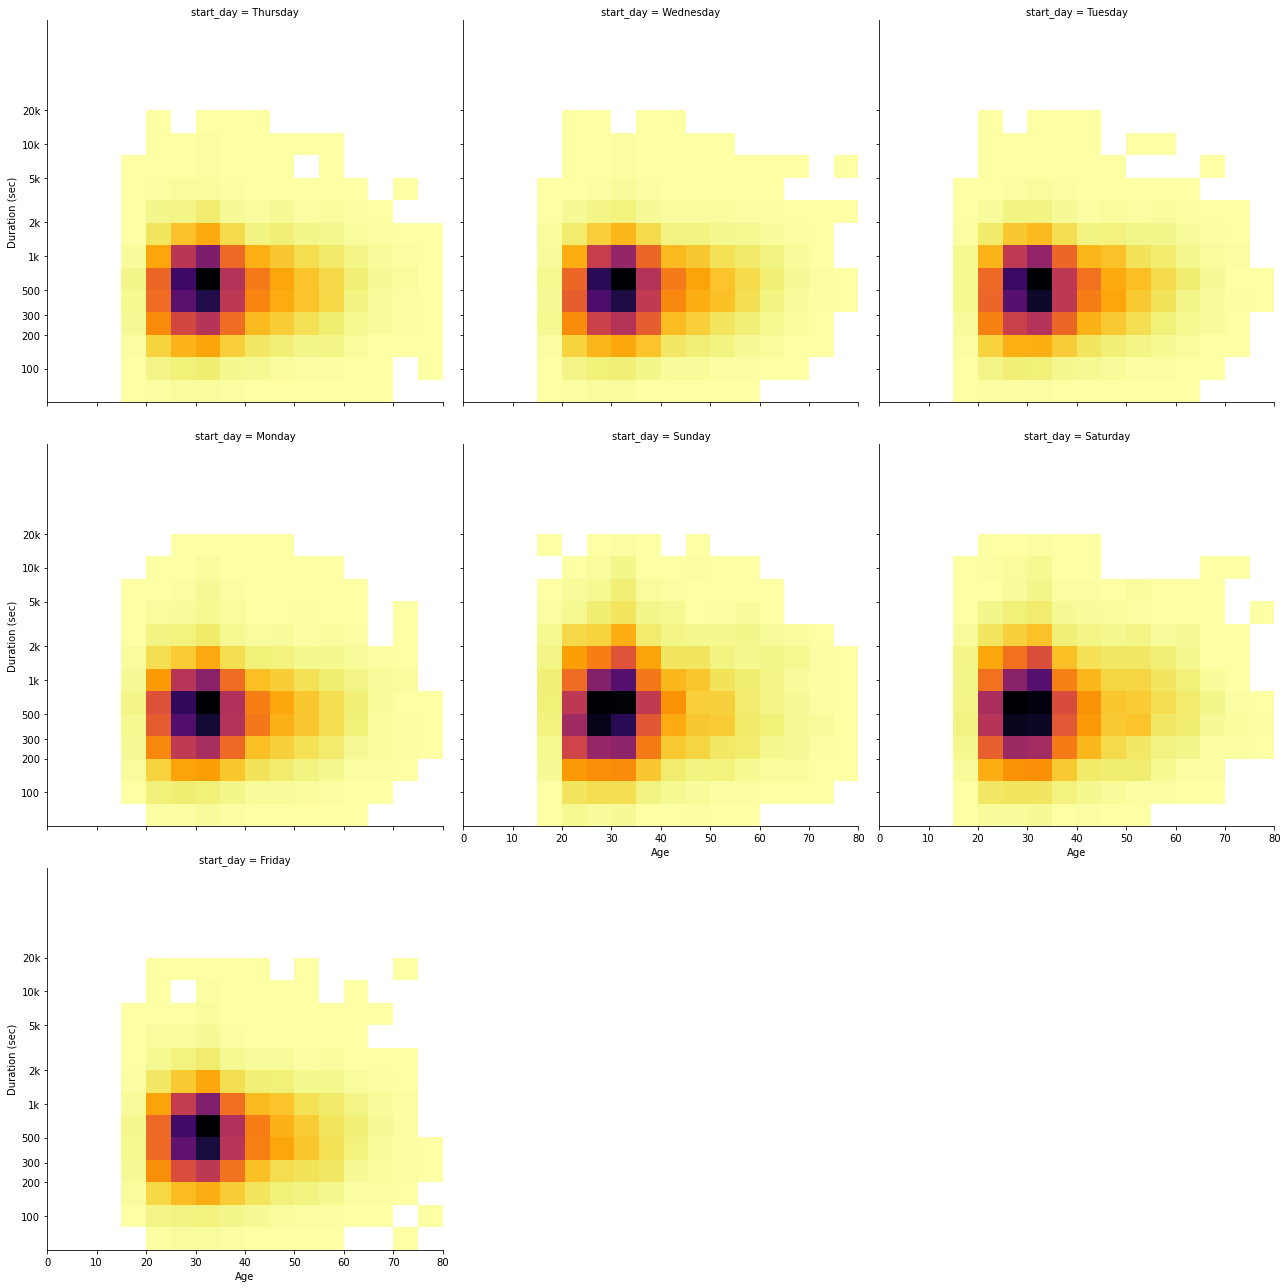

In [65]:
# create faceted heat maps on levels of the start day variable
g = sb.FacetGrid(data = df_no_outliers, col = 'start_day', col_wrap = 3, height = 6,
                 xlim = [0, 10])
g.map(hist2dgrid, 'Age', 'log_duration', color = 'inferno_r')
g.set_xlabels('Age')
g.set_ylabels('Duration (sec)')

plt.show()

This can finally conclude that there is really no rlationship between our age and distance variables and majority of our data is centered around an average age of 30 - 40 years with an average trip duration range between 300 - 1k secs.

In [66]:
df_no_outliers.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,Age,trip_id,distance(KM),log_duration
count,182713.000000,182713.000000,182713.000000,182713.000000,182713.000000,182713.000000,182713.000000,182713.000000,182713.000000
mean,668.476480,37.771587,-122.353040,37.771797,-122.352623,34.116363,91739.591343,1.691227,2.709880
std,717.044412,0.099001,0.116459,0.098900,0.116029,9.648280,52957.622636,1.082607,0.300803
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,18.000000,4.000000,0.000000,1.785330
25%,325.000000,37.770407,-122.412408,37.770407,-122.411726,27.000000,45889.000000,0.912028,2.511883
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,32.000000,91780.000000,1.432473,2.710963
75%,794.000000,37.797280,-122.286533,37.797320,-122.288665,38.000000,137622.000000,2.226224,2.899821
max,14962.000000,37.880222,-121.874119,37.880222,-121.874119,78.000000,183411.000000,9.929011,4.174990


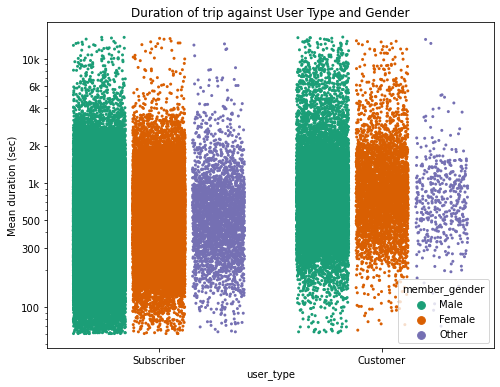

In [76]:
# Duration of trip against User Type and gender
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_no_outliers, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Dark2', jitter=0.35, dodge=True, size=3)
plt.title('Duration of trip against User Type and Gender')
plt.ylabel('Mean duration (sec)')
plt.yscale('log')
plt.yticks([100, 300, 500, 1e3, 2e3, 4e3, 6e3, 1e4], [100, 300, 500, '1k', '2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

From the above point plot, we can see more clearly that most users who are not subscribers but just customers tend to take longer trips than subscribers themselves. Also, from the plot, we can also see that females ride slightly longer than males

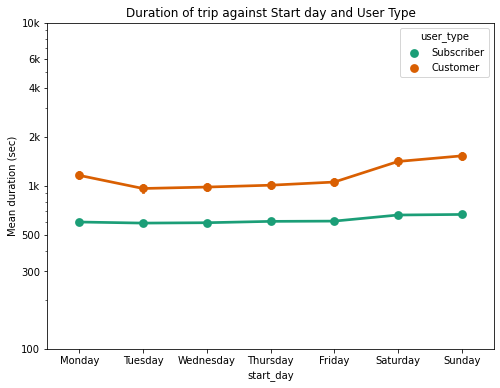

In [80]:
# Duration of trip against Start day and User Type
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_no_outliers, x = 'start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Dark2', order=day_order)
plt.title('Duration of trip against Start day and User Type')
plt.ylabel('Mean duration (sec)')
plt.yscale('log')
plt.yticks([100, 300, 500, 1e3, 2e3, 4e3, 6e3, 1e4], [100, 300, 500, '1k', '2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

We can see here that longer trips were taken on Saturdays and Sunday, even though we have more trips recorded on thursdays.

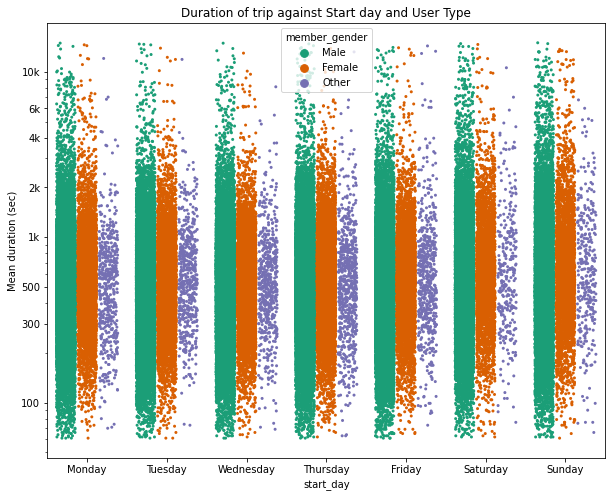

In [93]:
# Age against Start day and gender
fig = plt.figure(figsize = [10,8])
ax = sb.stripplot(data = df_no_outliers, x = 'start_day', y = 'duration_sec', hue = 'member_gender',
           palette = 'Dark2', order=day_order, jitter=0.35, dodge=True, size=3)
plt.title('Duration of trip against Start day and User Type')
plt.ylabel('Mean duration (sec)')
plt.yscale('log')
plt.yticks([100, 300, 500, 1e3, 2e3, 4e3, 6e3, 1e4], [100, 300, 500, '1k', '2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

We have a somewhat even distribution of genders that take trips on different days of the week, we cannot see any feasible point worth noting from these comparison.

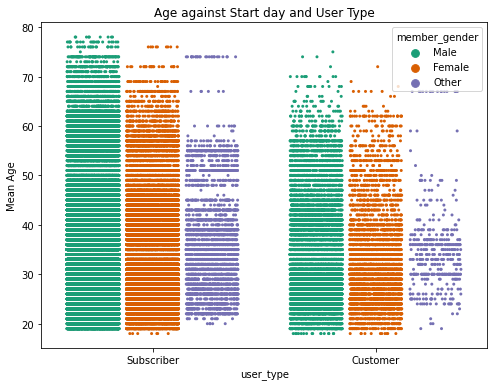

In [95]:
# Age against Start day and User Type
fig = plt.figure(figsize = [8,6])
ax = sb.stripplot(data = df_no_outliers, x = 'user_type', y = 'Age', hue = 'member_gender',
           palette = 'Dark2', jitter=0.35, dodge=True, size=3)
plt.title('Age against Start day and User Type')
plt.ylabel('Mean Age')

plt.show();

We can also still see similar distribution pattern when age is compared with usertypes and genders. We can see from the plot that more subscribers are present in our dataset as well as more males, and we can also tell that the age is not dependent on any of these two categorical variable, i.e, we do not have a certain categorical variable containing more younger or older age groups than the other.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Longer trips were taken on Saturdays and Sundays by customers mostly and not actual subscribers. 

### Were there any interesting or surprising interactions between features?

> Even with subscrbers being more than customers in this dataset, we could still see that a higher duration average of trips were taken by just customers

## Conclusions

From this exploratory analysis, here are a couple of observations worth noting:

> The dataset provided only covered trips taken in 2019 in the month of February. The occurances of trips in March were trips that started on the last day in February and ended on the first of March.
> The dataset recorded more subscribers than customers, however, we discovered that on average, customers took longer trips than actual subscribers.
> Another point worth noting is that majority of trips were taken on Thursdays, however, longer trips were taken on Saturdays and Sundays.
> Bike share had more males than females using their services.
> The average age of users was 34 years.
> The average trip took about 669 seconds, which is approximately 11 minutes.


In [81]:
# Saving our cleaned dataset with no outliers for explanatory analysis
trip_df_copy.to_csv('201902-fordgobike-tripdata_clean_no_outliers.csv', index = False)